In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
ds = pd.read_csv('glass.csv')

In [42]:
y = ds['Type'] - 1
m = len(y)
X = ds.drop('Type', axis=1)

In [43]:
# normalize data
X = [[(X.iloc[i, j]-X.iloc[:, j].mean())/(X.iloc[:, j].max()-X.iloc[:, j].min()) for j in range(len(X.iloc[i]))] for i in range(m)]
X = np.array(X, dtype=np.float64)

In [44]:
# one hot encoding
labels = np.zeros((m, 7))
for i in range(m):
    labels[i, y.iloc[i]] = 1

In [45]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [46]:
def sigmoid_der(z):
    return sigmoid(z) * (1 - sigmoid(z))

In [47]:
def softmax(z):
    expZ = np.exp(z)
    return expZ / expZ.sum(axis=1, keepdims=True)

In [48]:
def cost_function(labels, res):
    return np.sum(-labels * np.log(res))

In [63]:
hidden_layers = 10
labels_count = 7
lr = 0.01
iterations = 25000
j_history = np.array([0 for _ in range(iterations)], dtype=np.float32)

In [64]:
w1 = np.random.rand(X.shape[1], hidden_layers)
b1 = np.random.rand(hidden_layers)

In [65]:
w2 = np.random.rand(hidden_layers, labels_count)
b2 = np.random.rand(labels_count)

In [66]:
for i in range(iterations):
    # feed forward
    zh = np.dot(X, w1) + b1
    layerh = sigmoid(zh)
    layer0 = softmax(np.dot(layerh, w2) + b2)
    
    # back propagation
    tmp = layer0 - labels
    tmp1 = np.dot(tmp, w2.T)
    
    w2 -= np.dot(layerh.T, tmp) * lr
    w1 -= np.dot(X.T, sigmoid(zh) * tmp1) * lr
    
    b2 -= tmp.sum(axis=0) * lr
    b1 -= (tmp1 * sigmoid(zh)).sum(axis=0) * lr
    
    j_history[i] = cost_function(labels, layer0)

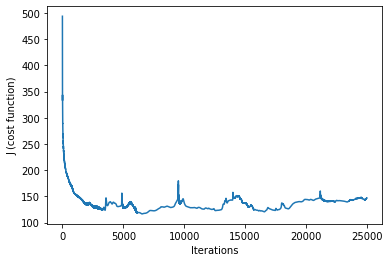

In [67]:
plt.plot(np.arange(0, iterations), j_history)
plt.ylabel('J (cost function)')
plt.xlabel('Iterations')
plt.show()

In [68]:
# feed forward
zh = np.dot(X, w1) + b1
layerh = sigmoid(zh)
layer0 = softmax(np.dot(layerh, w2) + b2)

In [74]:
print(w1, w2)

[[ 351.26177538 -112.08812661 -252.15217593 -121.90077321  259.01415655
   267.75978379 -108.24935821 -382.98119469  188.40525075 -149.15645897]
 [-487.97130447    4.46709897   68.2730767   181.01168479 -502.76394012
   161.37469906  171.06286746  419.24013855  321.74289822 -255.44562412]
 [-335.64979173 -152.3199484  -313.41282863   40.92822828 -162.97509512
   150.16530861  317.264304     -9.96187793 -470.97762813  394.94078627]
 [-159.60132653  204.59692701  431.61253262 -130.33658306  -59.70201476
  -191.05631589 -444.19174431  -53.73130515   38.81811557  604.15155805]
 [-120.18631718  -91.7657863  -210.44702762    7.32031733 -144.89976153
  -247.59032046  248.37448968  510.24058544  225.98286054    1.90773561]
 [-288.47108764  -29.39411931  301.05656065 -104.31675764   51.49676248
    -7.74180655 -284.98282039 -122.55157673  -13.68959315  304.90434289]
 [ 700.94222711   98.36367332 -126.33040589   26.8023307   412.12504576
    45.89207989   84.93701707 -401.67861057  -96.35625381 

In [77]:
result = np.argmax(layer0, axis = 1)
print(np.mean(result == y) * 100)

73.36448598130842
